<a href="https://colab.research.google.com/github/ElCald/CIFAR10/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Très bien, vous avez réussi à créer vos premières fonctions
d'entraînement et de validation avec PyTorch, et en plus, vous avez pu
tester un modèle de perceptron multicouche très basique. C'est un bon
début, mais le modèle ne s'entraîne pas très bien. C'est normal : avec
quelques simples couches, vous n'allez pas faire des miracles, surtout
sans certains détails que j'ai volontairement omis lors de la partie
précédente.

Ce TP va se concentrer **uniquement** sur les architectures de réseaux
de neurones, donc vous devez tous déjà avoir préparé vos boucles
d'entraînement et de validation avec CIFAR.




## Pourquoi Linear ne fonctionne-t-il pas sur CIFAR ?

Comme son nom l'indique, la couche Linear permet de multiplier des poids
sous forme d'une fonction linéaire en fonction du tenseur d'entrée. Vous
avez sûrement déjà fait de la régression linéaire en M1 (si, si,
souvenez-vous !). La couche *nn.Linear* permet de résoudre ce type de
relation qui peut être représentée par une simple droite, comme illustré
dans le code ci-dessous.

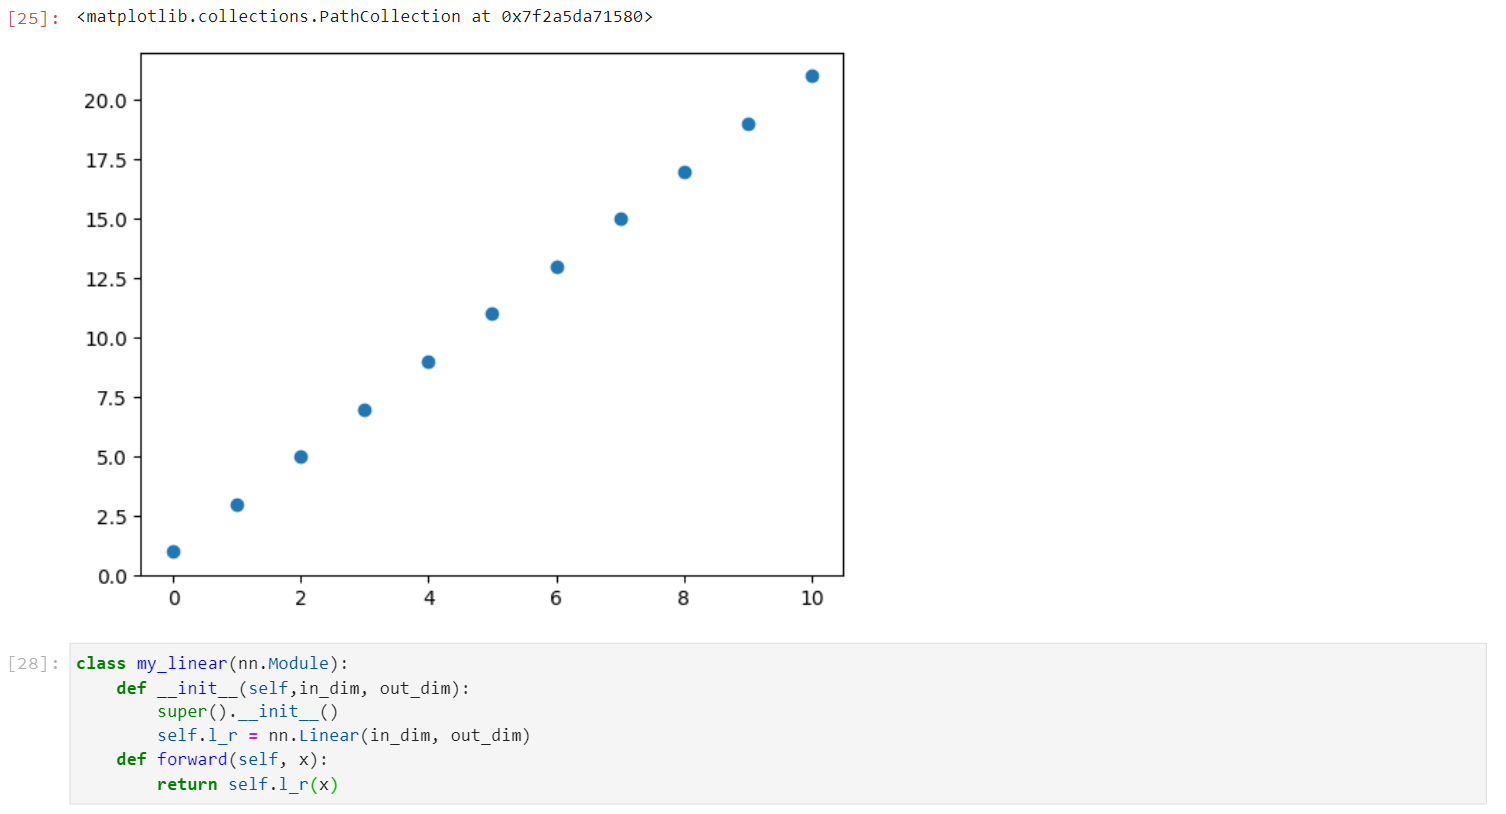

Avec un simple réseau de neurones linéaire, on obtient en fin de compte
une "simple" régression linéaire.

Si je fais un premier test sans entraîner le modèle, la fonction
retournée (une droite) est forcément incorrecte.

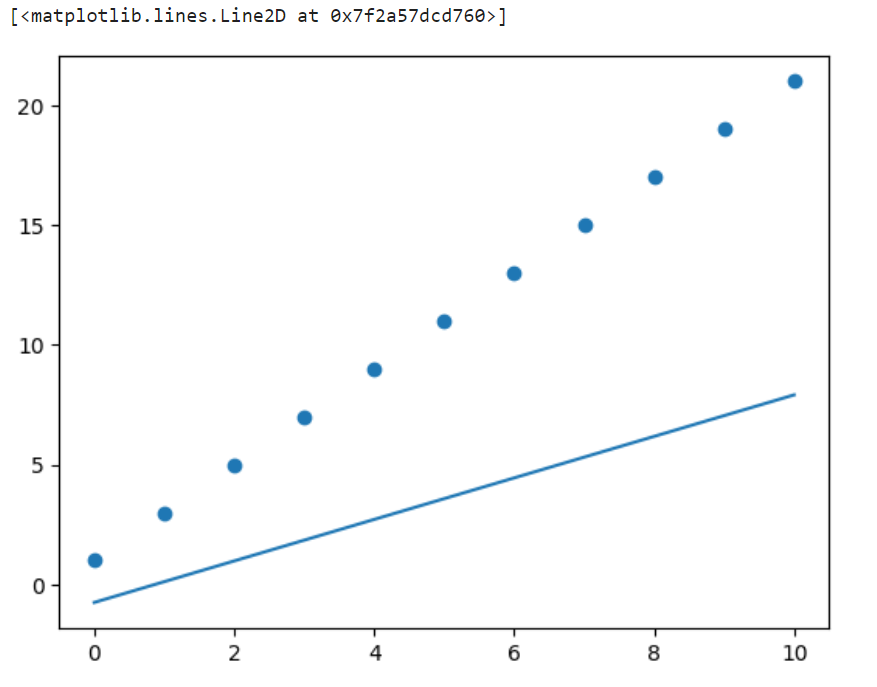



Cependant, après un peu d'entraînement (seulement 4 ou 5 époques), la
fonction générée par mon *nn.Linear* devient bien plus performante !

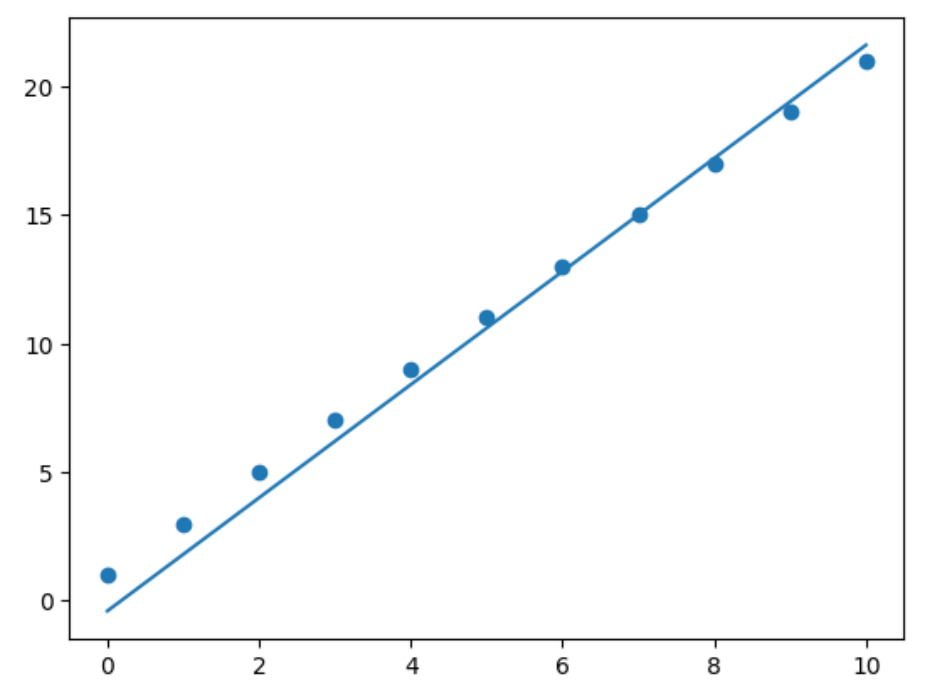

Mais que faire si nos données ne ressemblent pas du tout à un nuage de
points plus ou moins linéaires, avec une forte corrélation entre eux ?




# Non-linéarité en PyTorch

PyTorch propose une multitude de fonctions capables de modifier le
comportement d'une autre fonction (c'est ce qu'on appelle la "chain
rule", j'y reviendrai plus tard), afin d'introduire de la non-linéarité.
Par exemple, la fonction ReLU (illustrée ci-dessous) permet de
transformer une fonction f(x), représentée par *nn.Linear*, de manière à
ce que toutes les valeurs x de mon tenseur T, transformées par
*nn.Linear* (f(x)), soient égales à x si x est supérieur à 0, sinon
elles valent 0.

En mathématiques, cela s'appelle la "chain rule". Autrement dit, si vous
avez trois fonctions f(x), g(x), et h(x), vous pouvez tout à fait faire
f(g(h(x))). Pour nous, informaticiens, c'est assez simple à comprendre :
on modifie x avec la fonction h, le résultat de h(x) est ensuite modifié
par la fonction g, et enfin, le résultat de g est modifié par la
fonction f. Ce n'est pas très compliqué mathématiquement, mais c'est
toujours bon à savoir :)

Regardons maintenant une fonction non-linéaire.

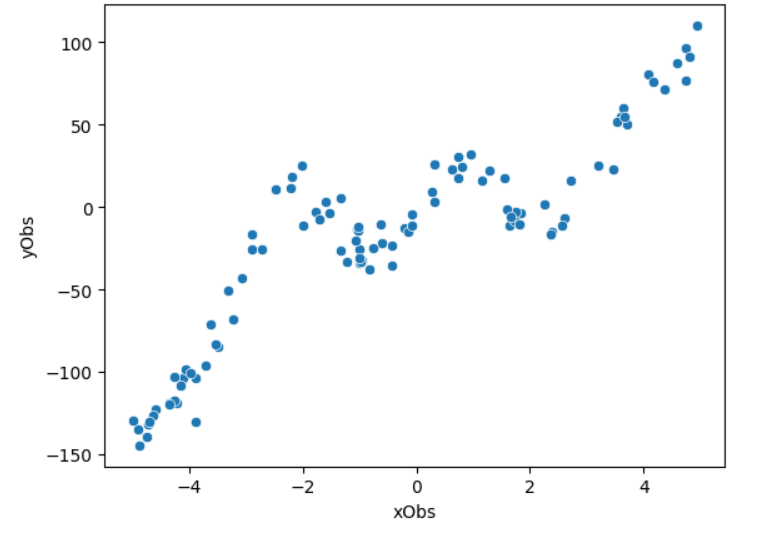

Ajoutons un peu plus de neurones à notre modèle !

Mais surtout, appliquons-y des fonctions non-linéaires...

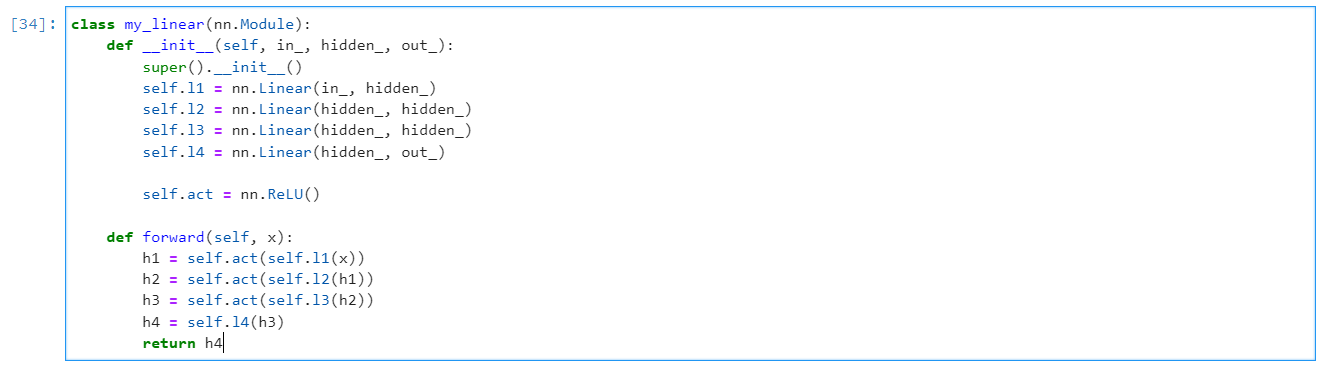

Grâce à cela, notre réseau peut se "déformer" pour mieux s'adapter aux
données et obtenir la fonction de perte la plus optimale !

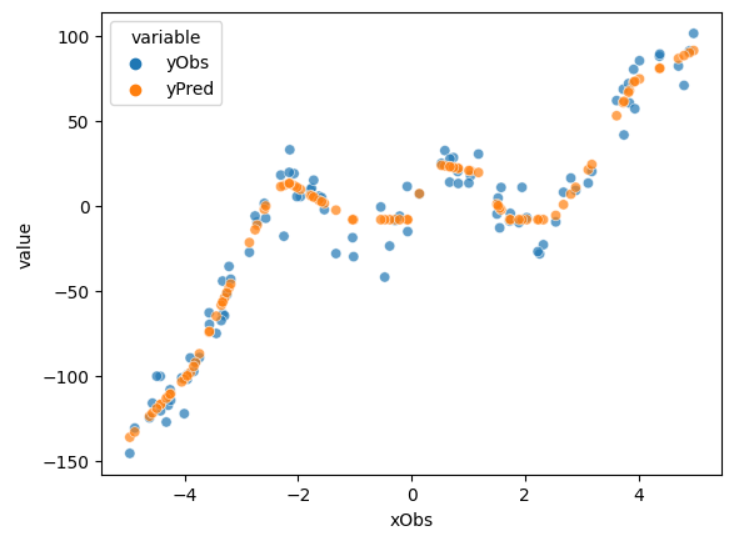



## Mathématiquement parlant

Pourquoi avons-nous besoin de non-linéarité, mathématiquement parlant ?

f(x) = 3x et g(x) = 2x + 10 sont deux fonctions **linéaires**. Que se
passe-t-il si nous les appliquons en "chain rule", comme nous le ferions
en PyTorch ?

        f = nn.Linear(10, 20)
        g = nn.Linear(20, 10)
        x = torch.randn(1, 10)
        g(f(x))
        

Voici un exemple de code avec un appel en "chain rule" : d'abord la
transformation f, puis g en fonction du résultat de f.

  

Mathématiquement, lorsque l'on enchaîne f(x) et g(x), cela revient pour
chaque x à faire 3 (2x + 10), ce qui est **également** une fonction
linéaire ! Nous avons simplement **complexifié** notre équation, mais
nous n'avons toujours pas résolu notre problème de non-linéarité. Par
conséquent, face à un problème complexe comme celui mentionné
précédemment, enchaîner des fonctions linéaires ne sera d'aucune utilité
si vous n'ajoutez pas de non-linéarité entre elles.

***Le même principe s'applique aux convolutions !!!***


# Et les images dans tout ça ?

L'exemple précédent est assez "simple" à comprendre pour un humain. On
peut visualiser les courbes et voir comment la fonction globale doit se
comporter pour obtenir de bons résultats... mais qu'en est-il pour une
image ?

Il est beaucoup plus difficile d'imaginer combien de fonctions non
linéaires sont nécessaires pour entraîner un modèle sur des images. En
général, un réseau de neurones pour CIFAR a presque toujours besoin de
non-linéarité afin de pouvoir extraire efficacement toutes les
caractéristiques possibles.

Et encore, nous parlons ici de CIFAR, qui est relativement simple.
Maintenant, imaginez le même problème avec des images haute définition
en 640x640 pixels, où l'objectif n'est plus seulement de classifier,
mais de dire précisément **où** se trouve un chien sur la photo, par
exemple.

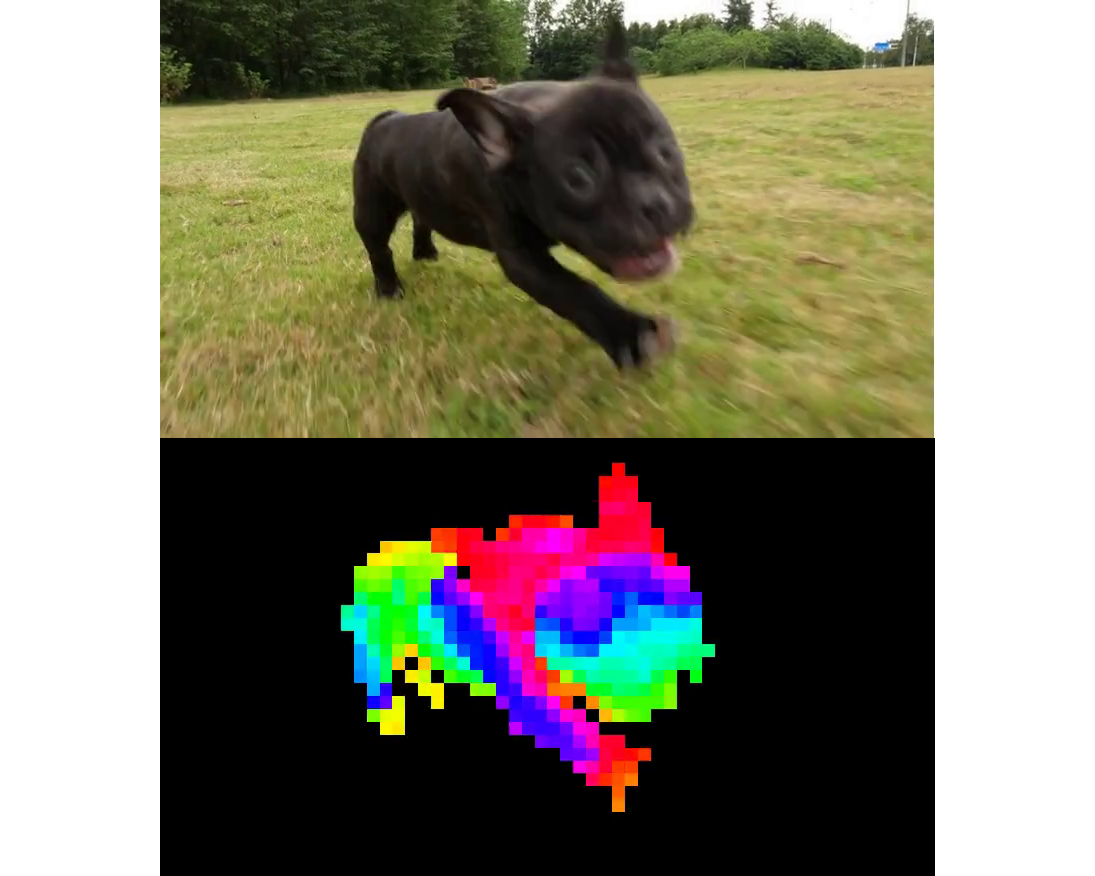

Dans ce cas, la complexité des données devient un vrai défi.

**Globalement, ajoutez de la non-linéarité dès que possible, sauf à la
dernière convolution, où l'on attend une "réponse" finale du modèle.**



# Préparation du modèle

Dans votre fonction d'entraînement, utilisez l'optimiseur Adam avec un
taux d'apprentissage (learning rate) de 0.0001 et un batch size de 128
(à définir dans le DataLoader).

**Tâche :** Construire un modèle comportant 4 couches de convolutions
linéaires avec une dimension cachée (*hidden_dim*) égale à 32 tout du
long.


        


In [1]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

In [2]:
# Importation de CIFAR10

# --- Préparation du dataset CIFAR-10 ---
transform = transforms.Compose([
    transforms.ToTensor(),              # Convertit en tenseur (valeurs entre 0 et 1)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisation RGB
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=128, shuffle=True)
test_loader  = DataLoader(testset, batch_size=128, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 77.6MB/s]


In [3]:
class my_class(nn.Module):
    def __init__(self, hidden_dim=32, out=10):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, out)
        self.relu = nn.ReLU()

    def forward(self, x):
        # x: (batch, channels, hauteur, largeur)
        x = x.permute(0, 2, 3, 1)      # -> (batch, hauteur, largeur, channels)
        x = x.reshape(x.size(0), -1)   # aplatit tout sauf batch
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [4]:
# Entrainement

# Init model et optimiseur
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = my_class().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Boucle entrainement
for epoch in range(5):  # 5 epoch
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Époque {epoch+1}, perte moyenne: {total_loss/len(train_loader):.4f}")


Époque 1, perte moyenne: 2.0709
Époque 2, perte moyenne: 1.8215
Époque 3, perte moyenne: 1.7315
Époque 4, perte moyenne: 1.6770
Époque 5, perte moyenne: 1.6376


In [5]:
# Evaluation
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nPrécision sur le jeu de test : {accuracy:.2f}%")


Précision sur le jeu de test : 42.83%



Normalement, vous devriez avoir un modèle plus ou moins performant, avec
environ 45% de précision.

Le problème avec les MLPs (Multi-Layer Perceptrons) réside dans la
manière dont ils "voient" les données. Si on pense en termes d'images,
avec notre tensor T de taille batch × channel × height × width, un MLP
ne traite les données qu’au niveau des pixels individuels. En d'autres
termes, il n'a pas conscience des pixels voisins et ne peut donc pas
adapter ses poids en fonction de leur influence, ce qui est évidemment
un inconvénient lorsqu'on travaille avec des images.

On pourrait, certes, fournir à notre MLP la taille de l'image plutôt que
les trois couches RGB, mais le coût de calcul deviendrait alors
drastiquement plus élevé ! Pour réduire ce coût, nous pourrions utiliser
une petite fenêtre de poids qui glisserait sur l'image. Le coût serait
ainsi lié à cette petite fenêtre plutôt qu'à un MLP massif reliant tous
les pixels entre eux. Eh bien, cette technique existe, et c'est ce qu'on
appelle les convolutions !



# Convolutions

Les convolutions peuvent être comparées à un MLP appliqué de manière
glissante sur une fenêtre de pixels, définie par la taille du kernel.
Pour mieux comprendre, voici la définition mathématique de base d'un
réseau de neurones, celle qui permet de créer nos modèles les plus
puissants. En général, les MLP, convolutions et autres architectures de
réseaux de neurones reposent sur le produit scalaire (dot-product), qui
consiste à multiplier deux vecteurs pour obtenir une seule valeur (un
scalaire). C'est pourquoi un MLP est défini avec une dimension d'entrée
et une dimension de sortie : on multiplie deux vecteurs de tailles
correspondantes (dimension d'entrée), et comme le calcul renvoie une
valeur unique, on le répète un certain nombre de fois (dimension de
sortie). Cependant, dans un MLP, nous cherchons à faire correspondre les
dernières dimensions sans avoir de vision globale des autres
informations. Avec les convolutions, nous réalisons un produit scalaire
sur une portion de l'image (appelée fenêtre) et répétons cette opération
en faisant glisser cette fenêtre sur l'image avec un décalage (stride)
défini par l'utilisateur.

Voici une illustration de ce concept, avec ce GIF issu de l'excellent
site [AnimatedAI](https://animatedai.github.io).


![AnimatedAI](https://animatedai.github.io/media/convolution-animation-3x3-kernel.gif)



# Convolutional Neural Network

Comme vous pouvez le constater, on peut obtenir en sortie - si on le souhaite - la même
taille que l'entrée, même en dimension spatiale, tout en agrégeant de
l'information spatiale en un seul pixel. Cela permet au réseau de
neurones convolutif de raffiner les informations voisines sur un seul et
même pixel, tout en stimulant l'information dans la dimension des
couches. Bingo ! Avec les convolutions, tous les éléments sont réunis
pour mieux traiter l'information : agréger les données spatiales et
traiter le format "image" de manière très efficace. D'ailleurs, nous
pouvons réduire la taille spatiale en utilisant un pas (stride)
supérieur à **1**.

Dans cette section, nous allons apprendre à créer un réseau de neurones
convolutif et le comparer à celui que nous avons créé précédemment avec
un MLP. Allons-y.

------------------------------------------------------------------------


**A faire -** Écrivez un code avec 3 convolutions et un multi-layer
perceptron pour réaliser la classification finale (il ressemble presque
exactement à ce que nous avons déjà fait dans les précédents cours).
Vous devez ajouter de la non-linéarité comme introduit précédemment
(attention, il y a un piège lors du dernier passage de neurones !).
Enfin, pour introduire cette fonction, toutes les convolutions utilisent
un stride de 1, mais nous voulons réduire la taille spatiale à chaque
passage ! Pour cela, utilisez *nn.MaxPool2d*.

Vous devriez obtenir plus de 50% d'accuracy (voire 60%).



In [6]:
# votre code ici
# --- Modèle CNN + MLP ---
class CNN_MLP(nn.Module):
    def __init__(self, hidden_dim=128, out=10):
        super().__init__()

        # === Partie Convolutionnelle ===
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # réduit de moitié la taille spatiale
        self.relu = nn.ReLU()

        # === Partie MLP ===
        # Après 3 MaxPool (2x2) : taille réduite 32 -> 16 -> 8 -> 4
        # donc feature map finale = 128 canaux * 4 * 4 = 2048
        self.fc1 = nn.Linear(128 * 4 * 4, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out)

    def forward(self, x):
        # --- Partie CNN ---
        x = self.pool(self.relu(self.conv1(x)))  # 3x32x32 -> 32x16x16
        x = self.pool(self.relu(self.conv2(x)))  # 32x16x16 -> 64x8x8
        x = self.pool(self.relu(self.conv3(x)))  # 64x8x8 -> 128x4x4

        # --- Passage au MLP ---
        x = x.view(x.size(0), -1)  # aplatit tout sauf batch
        x = self.relu(self.fc1(x)) # non-linéarité interne
        x = self.fc2(x)            # pas de ReLU ici ! (logits bruts)
        return x

# --- Initialisation ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# --- Entraînement ---
for epoch in range(5):  # 5 époques pour l’exemple
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Époque {epoch+1}, perte moyenne: {total_loss/len(train_loader):.4f}")



Époque 1, perte moyenne: 1.8386
Époque 2, perte moyenne: 1.5006
Époque 3, perte moyenne: 1.3912
Époque 4, perte moyenne: 1.3231
Époque 5, perte moyenne: 1.2722


In [7]:
# --- Évaluation ---
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nPrécision sur le jeu de test : {100 * correct / total:.2f}%")


Précision sur le jeu de test : 54.53%




# Strided Convolutions

Nos codes commencent à ressembler à quelque chose !

Jusqu'à présent, je vous ai demandé d'utiliser *MaxPool2d*, mais
qu'est-ce qui se cache derrière un MaxPool ?

Comme son nom l'indique, il recherche la valeur maximale dans un "pool",
un voisinage de pixels (une fenêtre 2x2 par exemple), l'extrait du
tenseur d'entrée et le stocke dans le tenseur de sortie. Par conséquent,
vous récupérez un seul pixel à partir d'une fenêtre 2x2, soit 4 pixels.
Le MaxPool utilise le même comportement que les convolutions,
c'est-à-dire que la fenêtre "glisse" sur l'image. Par conséquent, avec
une fenêtre 2x2, vous réduisez la taille d'entrée par 2 en hauteur et 2
en largeur.

Question simple : comment réduire la taille d'une image
uniquement avec des convolutions ? Bon, la réponse est dans le titre de la section...

------------------------------------------------------------------------

**A faire -** Modifiez votre code en remplaçant les appels de MaxPool
par des convolutions stridées.



In [8]:
# --- Modèle CNN (avec convolutions stridées) + MLP ---
class CNN_Strided(nn.Module):
    def __init__(self, hidden_dim=128, out=10):
        super().__init__()

        # === Partie Convolutionnelle ===
        # Stride = 2 -> réduit la taille spatiale à chaque fois
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)   # 3x32x32 -> 32x16x16
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)  # 32x16x16 -> 64x8x8
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1) # 64x8x8 -> 128x4x4
        self.relu = nn.ReLU()

        # === Partie MLP ===
        self.fc1 = nn.Linear(128 * 4 * 4, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, out)

    def forward(self, x):
        # --- Partie CNN ---
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))

        # --- Partie MLP ---
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)   # pas de ReLU ici (on garde les logits)
        return x

# --- Initialisation ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_Strided().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# --- Entraînement ---
for epoch in range(5):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Époque {epoch+1}, perte moyenne: {total_loss/len(train_loader):.4f}")


Époque 1, perte moyenne: 1.9495
Époque 2, perte moyenne: 1.6360
Époque 3, perte moyenne: 1.5159
Époque 4, perte moyenne: 1.4536
Époque 5, perte moyenne: 1.4082


In [9]:
# --- Évaluation ---
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nPrécision sur le jeu de test : {100 * correct / total:.2f}%")


Précision sur le jeu de test : 50.70%



------------------------------------------------------------------------

Quel est l'intérêt ? Eh bien... tout dépend de
votre problème, de votre jeu de données, de votre architecture. Bref,
vous l'aurez compris, comme souvent en Deep Learning : il faut observer
les comportements d'entraînement, ajuster certains hyperparamètres
(comme le learning rate, batch size, etc.), mais aussi modifier certains
détails dans votre architecture.

Je sais que le Deep Learning est un sujet complexe. Certains enseignants
abordent ce domaine en insistant sur des mathématiques très poussées,
mais je crois plutôt en votre **curiosité**. C'est un domaine qui
sollicite et cultive la curiosité. Codez, testez, créez des algorithmes
de recherche des meilleurs paramètres, posez-vous des questions et
imaginez des architectures capables de repousser les limites de ce qui
existe déjà.

Maintenant, découvrons la technique la plus puissante et pourtant la
plus "simple" du Deep Learning, qui a permis en 2015 de révolutionner
les performances des réseaux de neurones. (2015 semble vieux, mais il a
fallu tant de temps pour découvrir cette technique...)



# Connexions résiduelles

Voilà un sujet important : les connexions résiduelles. Pour aller droit
au but, voici une définition simple :

Imaginons une fonction f(x) = 2x.

On pourrait simplement passer la variable z = 3 dans f(x) pour obtenir
la valeur 6. Ou alors...

On crée une connexion résiduelle, ce qui signifie que l'on passe z dans
f(x) et qu'on additionne le résultat à z lui-même.

Soit : y = f(z) + z = f(3) + 3 = 6 + 3 = 9.

Ce n'est peut-être pas très frappant pour l'instant, mais imaginez cela
avec des polynômes de plusieurs degrés ou avec des fonctions extrêmement
complexes, comme celles que les algorithmes de descente de gradient et
de rétropropagation découvrent dans un réseau de neurones. Cette simple
"connexion" permet au réseau de s'entraîner de manière plus efficace,
mais surtout de devenir beaucoup, **beaucoup**, ***beaucoup*** plus
profond !

Encore un petit exemple mathématique (je vous promets, c'est presque
fini pour cette section (ou pas)) :

![residual](https://lilianhollard.github.io/assets/images/Convolution_Animation_Gaussian.gif)

Regardez ces deux fonctions (f et g). Vous pouvez voir que la
convolution de la fonction g appliquée à l'entrée f(x), votre tenseur
serait la fonction f et votre filtre, la fonction g.

Le problème avec les réseaux de neurones, c'est que ces réductions
successives amenuisent les fonctions à chaque couche. Même si cela aide
à extraire des informations utiles de données complexes comme des
images, un réseau trop profond finira par tendre vers 0 et n'apprendra
plus rien, même si on continue d'ajouter des couches.

Cependant, avec une connexion résiduelle, on **évite** ce problème, car
on réinjecte l'information d'origine de manière résiduelle, comme pour
rappeler au réseau : "ne perds pas de vue ce qu'on t'a donné".

Vous avez compris ? Alors, passons au code !



------------------------------------------------------------------------

**A faire -** Reprenez votre code avec MaxPool (ce sera plus simple pour
le moment, vous verrez pourquoi plus tard).

1\. Après chaque convolution, ajoutez une connexion résiduelle avec le
tenseur d'entrée.

2\. Pourquoi n'aurait-on pas pu le faire avec une convolution à stride ?

------------------------------------------------------------------------



Pour conclure cette section, sachez que si les dimensions de vos tenseurs
le permettent, vous pouvez tout à fait faire deux convolutions en
parallèle sur un même tenseur x, comme ceci : y1 = f(x) et y2 = g(x),
puis additionner les deux résultats : y = y1 + y2 !



# Batch normalization

La **Batch Normalization** est une technique utilisée dans les réseaux
de neurones pour améliorer la stabilité et la vitesse d'entraînement.
Introduite par Sergey Ioffe et Christian Szegedy en 2015, elle permet de
normaliser les activations intermédiaires d'un réseau au sein de chaque
mini-batch pendant l'entraînement.

**Pourquoi utiliser la Batch Normalization ?**

Dans un réseau de neurones profond, les activations des couches
intermédiaires peuvent subir de grandes variations à mesure que
l'entraînement progresse. Ce phénomène, appelé *internal covariate
shift*, complique l'optimisation du modèle car les couches suivantes
doivent constamment s'ajuster aux changements dans les distributions des
activations des couches précédentes.

La **Batch Normalization** combat ce problème en normalisant les
activations d’une couche, en ajustant leur moyenne et leur variance à
des valeurs plus stables. Cela aide à :

1. **Accélérer l'entraînement** : en réduisant les oscillations et en
rendant le paysage d'optimisation plus lisse, l'entraînement converge
plus rapidement.

2. **Stabiliser l'apprentissage** : les gradients deviennent plus
stables, ce qui réduit les risques d'explosions ou de disparitions de
gradients.

3. **Réduire la dépendance à l'initialisation des poids** : le réseau
devient moins sensible à l'initialisation des poids, ce qui facilite la
configuration de l'entraînement.

**Comment fonctionne la Batch Normalization ?**

Lors de l’entraînement, pour chaque mini-batch de données, la Batch
Normalization fonctionne en trois étapes clés :

1. **Calcul de la moyenne et de la variance** : Pour un mini-batch de
taille m, on calcule la moyenne et la variance des activations des
neurones pour chaque dimension.

2. **Normalisation des activations** : Les activations du mini-batch
sont ensuite normalisées en soustrayant la moyenne et en divisant par
l'écart-type, avec une petite constante ajoutée pour éviter la division
par zéro.

3. **Recalibrage** : Enfin, les activations normalisées sont
transformées via deux paramètres appris : une échelle et un décalage,
permettant au réseau de retrouver ses capacités d'expression si
nécessaire.

**Avantages de la Batch Normalization**

- Convergence plus rapide : En réduisant la variance des gradients, la
Batch Normalization permet au modèle de converger plus vite.

- Stabilisation : Elle atténue les problèmes de disparition ou
d’explosion des gradients dans les réseaux profonds.

- Généralisation : En servant d’outil de régularisation, elle aide à
prévenir le surapprentissage, agissant ainsi de manière similaire au
dropout.




**Utilisation dans PyTorch**

En PyTorch, la Batch Normalization est implémentée via la couche
\`nn.BatchNorm1d\` ou \`nn.BatchNorm2d\` (selon la dimension des
données). Voici un exemple simple d'utilisation dans un réseau :

        

In [ ]:
import torch.nn as nn

        class SimpleCNN(nn.Module):
            def __init__(self):
                super(SimpleCNN, self).__init__()
                self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
                self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
                self.relu = nn.ReLU()

            def forward(self, x):
                x = self.conv1(x)
                x = self.bn1(x)  # Normalisation après la convolution
                x = self.relu(x)
                return x


        

Dans cet exemple, la normalisation est appliquée après la couche de
convolution pour stabiliser les activations.

La Batch Normalization est une technique simple mais puissante,
désormais largement utilisée dans presque tous les réseaux de neurones
modernes. Elle permet non seulement d'accélérer l'entraînement, mais
aussi d'améliorer la performance et la robustesse des modèles.



# Créez votre propre objet convolution

En PyTorch, vous pouvez créer votre propre objet qui effectue à la fois
une initialisation et un passage en avant (forward). Ce qui est
intéressant, c'est de pouvoir créer un objet, par exemple *my_conv*, qui
effectue non seulement une convolution, mais aussi une batch
normalization, et enfin une activation. Il suffit ensuite d'appeler cet
objet (le constructeur de *my_conv*) pour créer une instance de cet
objet et l'utiliser dans une autre classe PyTorch.

------------------------------------------------------------------------

**A faire -** Codez un objet qui intègre une convolution, une batch
normalization, et une activation. Modifiez le code précédent de manière
à ce que votre modèle utilise cet objet pour chaque convolution.



------------------------------------------------------------------------

Et ensuite ?

Vous avez maintenant toutes les clés pour concevoir des réseaux de
neurones performants !

Voici des exercices plus complexes.

------------------------------------------------------------------------

**Bottleneck**

Utiliez votre objet *nn.Module* avec activation, batch norm et
convolution.

Créez un autre objet qui fait appel à celui-ci 3 fois !

Une première fois pour **réduire** l'information.

Une deuxième fois pour maintennir l'information.

Une dernière fois pour revenir à l'information de l'entrée (ou augmenter
le nombre de couche vers un nombre de couche *sortante* défini par
l'utilisateur.

Enfin, ajoutez une connection résiduelle dans le cas où la taille de
couche sortante est égale à la taille de couche entrante.

Faite un stacking de bottleneck, testez différents filtre (convolution
1x1, 3x3, 5x5), testez différente taille de couche et faite
l'entrainement sur CIFAR10.

**Attention, c'est un exercice à rendre au complet avec les boucles
d'entrainements etc.(faites un git, vous pourrez le mettre en valeur,
CIFAR est réputé dans le milieu).**

------------------------------------------------------------------------

------------------------------------------------------------------------

**Inverted Bottleneck**

Utiliez votre objet *nn.Module* avec activation, batch norm et
convolution.

Créez un autre objet qui fait appel à celui-ci 3 fois !

Une première fois pour **augmenter** l'information avec une convolution
1x1.

Une deuxième fois pour maintennir l'information avec une convolution
\>=3x3. Cette convolution est dite "groupé" ou "depthwise". Je ne l'ai
pas introduit dans ce webcours, je fais appelle à votre capacité a
fouiller sur internet, c'est une technique très réputée. (Petit tips en
PyTorch : *nn.Conv2d(...., groups=n)*

Une dernière fois pour revenir à l'information de l'entrée avec une
convolution 1x1 (ou réduire le nombre de couche vers un nombre de couche
*sortante* défini par l'utilisateur.

Enfin, ajoutez une connection résiduelle dans le cas où la taille de
couche sortante est égale à la taille de couche entrante.

Faite un stacking de bottleneck, testez différents filtre (convolution
1x1, 3x3, 5x5), testez différente taille de couche et faite
l'entrainement sur CIFAR10.

**Attention, c'est un exercice à rendre au complet avec les boucles
d'entrainements etc.(faire un git, vous pourrez le mettre en valeur,
CIFAR est réputé dans le milieu).**

------------------------------------------------------------------------

Credits : Lilian Hollard (https://lilianhollard.github.io/assets/cours/deepdive.html)